<a href="https://colab.research.google.com/github/Tikuh5/2024_Geoinformatique_I/blob/main/personnes_par_peri_et_cmne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Installation Pandas

!pip install pandas
import pandas as pd

In [ ]:
## Installation GeoPandas

!pip install geopandas
import geopandas as gpd

In [ ]:
## Installation Shapely

!pip install shapely
from shapely import unary_union

In [ ]:
## Installation Pyogrio

!pip install pyogrio
import pyogrio

In [ ]:
## téléchargement de la zone d'étude

from google.colab import files
uploaded = files.upload()

ze_gpkg = '/content/geoinf-proj-ze-3935.gpkg'

Saving geoinf-proj-ze-3935.gpkg to geoinf-proj-ze-3935 (1).gpkg


In [ ]:
## Couches du gpkg de la ze dans QGIS

pyogrio.list_layers(ze_gpkg)

array([['ze_3935', 'MultiPolygon'],
       ['perimetre_ze_joint', 'Polygon'],
       ['polygone', 'Polygon'],
       ['perimetre_evaluation', 'Polygon'],
       ['geoinfprojze3935__ze_3935', 'MultiPolygon']], dtype=object)

In [ ]:
## Définition de la zone d'étude

ze = gpd.read_file(ze_gpkg, layer='ze_3935')

In [ ]:
## Zones tampons

tamp_500m = ze.buffer(500)
tamp_1km = ze.buffer(1000)
tamp_5km = ze.buffer(5000)

In [ ]:
## Uniformisation des zones tampons
tampon_500m = unary_union(tamp_500m)
tampon_1km = unary_union(tamp_1km)
tampon_5km = unary_union(tamp_5km)

In [ ]:
## Anneaux entre les zones tampons

anneau_500m = tampon_500m.difference(tampon_1km)
anneau_1km = tampon_1km.difference(tampon_5km)

In [ ]:
## téléchargement des couches communales et cantonales

from google.colab import files
uploaded = files.upload()
admin_gpgk = '/content/admin.gpkg'

Saving admin.gpkg to admin.gpkg


In [ ]:
## Couches du gpkg canto-communal dans QGIS

pyogrio.list_layers(admin_gpgk)

array([['communes', 'MultiPolygon Z'],
       ['cantons', 'MultiPolygon Z']], dtype=object)

In [ ]:
## Définition des communes

cmne = gpd.read_file(admin_gpgk, layer='communes')

In [36]:
## Dictionnaire et GeoDataFrames tampon

zi_buf = {
    '500m': tampon_500m,
    '1km': tampon_1km,
    '5km': tampon_5km
}

zi_buf_gdf = {
    k: gpd.GeoDataFrame(geometry=[poly], crs='EPSG:2056')
    for k, poly in zi_buf.items()
}

In [39]:
## Zones tampon communales

zi_buf_cmnes = {
    k: gpd.overlay(zi_gdf, cmne, how='intersection')
    for k, zi_gdf in zi_buf_gdf.items()
}

In [40]:
## Vérification

zi_buf_gdf['500m']
zi_buf_cmnes['500m']

,id,uuid,datum_aenderung,datum_erstellung,erstellung_jahr,erstellung_monat,grund_aenderung,herkunft,herkunft_jahr,herkunft_monat,...,bezirksnummer,kantonsnummer,name,gem_flaeche,see_flaeche,icc,shn,einwohnerzahl,hist_nr,geometry
0,1500,{F661E081-0F7D-49AF-BC8F-3BCB066A80EA},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,...,2229.0,22.0,Bussigny,481.0,0.0,CH,CH22295624,10365,15651.0,"POLYGON Z ((2532736.987 1155019.221 394.344, 2..."
1,1796,{744A1068-A8FB-4408-B238-8992F5E1AA07},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,...,2229.0,22.0,Renens (VD),295.0,0.0,CH,CH22295591,21086,14580.0,MULTIPOLYGON Z (((2534196.813 1154746.639 417....
2,1954,{90A64C89-AF3E-4247-B337-C41265776989},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,...,2229.0,22.0,Chavannes-près-Renens,165.0,0.0,CH,CH22295627,8737,14860.0,"POLYGON Z ((2533980.729 1154334.58 413.017, 25..."
3,2083,{849EDC23-04AA-4A5A-9FC4-FA01A9ECFE3A},2023-11-08,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,...,2229.0,22.0,Ecublens (VD),572.0,0.0,CH,CH22295635,13118,14721.0,"POLYGON Z ((2533805.512 1154247.947 414.502, 2..."
4,2129,{C29D857E-F9F2-4916-875B-5692D97BD8FD},2023-10-24,2008-11-24,2006,1,Verbessert,swisstopo,2024,1,...,2229.0,22.0,Crissier,550.0,0.0,CH,CH22295583,9181,14832.0,"POLYGON Z ((2534196.783 1154753.285 427.315, 2..."


<Axes: >

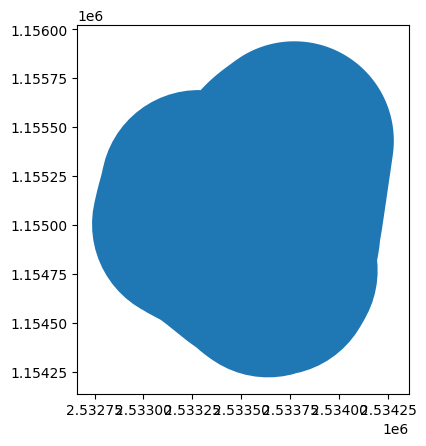

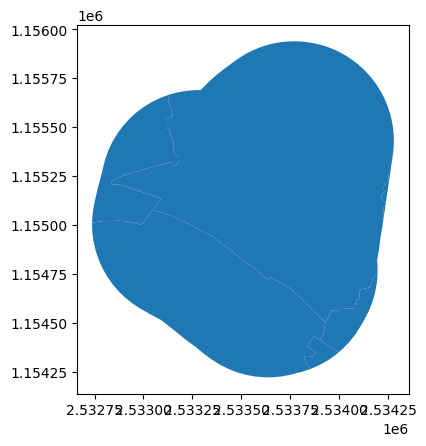

In [41]:
## Affichage des zones

zi_buf_gdf['500m'].plot()
zi_buf_cmnes['500m'].plot()

In [42]:
## Télécharger le gpkg avec la population et les emplois
from google.colab import files
uploaded = files.upload()

Saving ofs_geostat.gpkg to ofs_geostat.gpkg


In [45]:
ofs_geostat_gpkg = '/content/ofs_geostat.gpkg'

In [65]:
## Conversion  couches population et emplois en GDF

pop23_gdf = gpd.read_file(ofs_geostat_gpkg, layer='pop_2023')
empl22_gdf = gpd.read_file(ofs_geostat_gpkg, layer='empl_2022')

print(pop23_gdf)

     BBTOT    E_KOORD    N_KOORD  BBTOT2                 geometry
0        5  2523600.0  1147300.0       5  POINT (2523600 1147300)
1        3  2523600.0  1147400.0       3  POINT (2523600 1147400)
2       21  2523600.0  1147500.0      21  POINT (2523600 1147500)
3      103  2523600.0  1147600.0     103  POINT (2523600 1147600)
4      126  2523600.0  1147700.0     126  POINT (2523600 1147700)
...    ...        ...        ...     ...                      ...
7499    31  2543500.0  1156300.0      31  POINT (2543500 1156300)
7500     8  2543500.0  1157500.0       8  POINT (2543500 1157500)
7501     3  2543500.0  1164100.0       3  POINT (2543500 1164100)
7502     3  2543500.0  1164200.0       3  POINT (2543500 1164200)
7503     3  2543500.0  1164300.0       3  POINT (2543500 1164300)

[7504 rows x 5 columns]


In [67]:
## Création de la fonction sjoin, qui va associer des points à des polygones

def sjoin_summarize(poly_lyr, pts_lyr, pts_colname, poly_newcolname):
    """
    poly_lyr:         la couche des polygones
    pts_lyr:          la couche des points
    pts_colname:      la colonne sur laquelle il faut faire la somme
    poly_newcolname:  le nom de la colonne à créer dans la couche
                      des polygones
    """
    # Faire d'abord une jointure spatiale pour associer chaque point à un polygone
    sjoin = pts_lyr.sjoin(poly_lyr, how='inner', predicate='within')

    # Faire une opération «group by» selon l'index du polygone, et calculer la somme
    somme_par_poly = sjoin.groupby(sjoin.index_right)[pts_colname].sum()

    # Enregistrer le résultat dans la couche des polygones
    poly_lyr[poly_newcolname] = poly_lyr.index.map(somme_par_poly)
    return poly_lyr

In [70]:
## Fonction sjoin appliquée pour toutes les zones tampons

zi_buf_cmnes_500m = sjoin_summarize(zi_buf_cmnes['500m'], pop23_gdf, 'BBTOT2', 'pop_2023_sum')
zi_buf_cmnes_500m = sjoin_summarize(zi_buf_cmnes['500m'], empl22_gdf, 'B08EMPT', 'empl_2022_sum')

zi_buf_cmnes_1km = sjoin_summarize(zi_buf_cmnes['1km'], pop23_gdf, 'BBTOT2', 'pop_2023_sum')
zi_buf_cmnes_1km = sjoin_summarize(zi_buf_cmnes['1km'], empl22_gdf, 'B08EMPT', 'empl_2022_sum')

zi_buf_cmnes_5km = sjoin_summarize(zi_buf_cmnes['5km'], pop23_gdf, 'BBTOT2', 'pop_2023_sum')
zi_buf_cmnes_5km = sjoin_summarize(zi_buf_cmnes['5km'], empl22_gdf, 'B08EMPT', 'empl_2022_sum')


In [71]:
## Vérification des résultats
print (zi_buf_cmnes_500m.columns)
print (zi_buf_cmnes_1km.columns)
print (zi_buf_cmnes_5km.columns)

Index(['id', 'uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr',
       'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr',
       'herkunft_monat', 'revision_jahr', 'revision_monat',
       'revision_qualitaet', 'objektart', 'bfs_nummer', 'bezirksnummer',
       'kantonsnummer', 'name', 'gem_flaeche', 'see_flaeche', 'icc', 'shn',
       'einwohnerzahl', 'hist_nr', 'geometry', 'pop_2023_sum',
       'empl_2022_sum'],
      dtype='object')
Index(['id', 'uuid', 'datum_aenderung', 'datum_erstellung', 'erstellung_jahr',
       'erstellung_monat', 'grund_aenderung', 'herkunft', 'herkunft_jahr',
       'herkunft_monat', 'revision_jahr', 'revision_monat',
       'revision_qualitaet', 'objektart', 'bfs_nummer', 'bezirksnummer',
       'kantonsnummer', 'name', 'gem_flaeche', 'see_flaeche', 'icc', 'shn',
       'einwohnerzahl', 'hist_nr', 'geometry', 'pop_2023_sum',
       'empl_2022_sum'],
      dtype='object')
Index(['id', 'uuid', 'datum_aenderung', 'datum_erstell

In [73]:
## Périmètre des zones tampons, données correspondantes, vérification du résultat
zi_buf_cmnes_500m['peri'] = '500m'
zi_buf_cmnes_1km['peri'] = '1km'
zi_buf_cmnes_5km['peri'] = '5km'
data_500m = zi_buf_cmnes_500m[['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]
data_1km = zi_buf_cmnes_1km[['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]
data_5km = zi_buf_cmnes_5km[['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum']]
print(data_500m.columns)
print(data_1km.columns)
print(data_5km.columns)

Index(['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum'], dtype='object')
Index(['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum'], dtype='object')
Index(['bfs_nummer', 'name', 'peri', 'pop_2023_sum', 'empl_2022_sum'], dtype='object')


In [80]:
## Changement des valeurs manqueantes (NaN->0)

final_data.fillna(0,inplace=True)

In [81]:
## Concaténation des données

final_data = pd.concat([data_500m, data_1km, data_5km], ignore_index=True)

In [82]:
## Conversion des colonnes en lignes numériques

final_data['pop_2023_sum'] = pd.to_numeric(final_data['pop_2023_sum'], errors='coerce')
final_data['empl_2022_sum'] = pd.to_numeric(final_data['empl_2022_sum'], errors='coerce')

In [84]:
## Vérification avec les 1ères lignes
print(final_data.head())
print(final_data.dtypes)

   bfs_nummer                   name  peri  pop_2023_sum  empl_2022_sum
0        5624               Bussigny  500m          21.0         1562.0
1        5591            Renens (VD)  500m         804.0          386.0
2        5627  Chavannes-près-Renens  500m         205.0          120.0
3        5635          Ecublens (VD)  500m        3184.0          777.0
4        5583               Crissier  500m        5428.0         4244.0
bfs_nummer         int32
name              object
peri              object
pop_2023_sum     float64
empl_2022_sum    float64
dtype: object


In [86]:
## Calcul des personnes par zone

final_data['Njsem'] = final_data['pop_2023_sum'] * 0.3 + final_data['empl_2022_sum'] * 0.8
final_data['Nnsem'] = final_data['pop_2023_sum'] * 0.9 + final_data['empl_2022_sum'] * 0.05
final_data['Njwe'] = final_data['pop_2023_sum'] * 0.6 + final_data['empl_2022_sum'] * 0.05
final_data['Nnwe'] = final_data['pop_2023_sum']

In [87]:
## Sauvegarde dans un fichier CSV

final_data.to_csv("personnes_par_peri_et_cmne.csv", index=False)

In [88]:
## Téléchargement du fichier CSV

from google.colab import files
files.download("personnes_par_peri_et_cmne.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>